# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime

%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [5]:
df.shape

(17290, 21)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [9]:
#len('20141006T000000') # 8 
'20141006'[0:4], '20141006'[4:6], '20141006'[6:8]


('2014', '10', '06')

In [10]:
# DATE COL converted to year, month, date
train_df = df.copy()
#
train_df.date = train_df.date.apply(lambda x: x[0:8])
train_df.date.value_counts()

20140625    111
20140623    111
20140626    106
20140708    101
20150422     99
20140709     98
20150427     97
20150429     97
20140617     96
20150414     96
20140826     96
20150428     96
20140528     94
20150408     93
20150421     93
20140520     93
20140820     92
20140603     92
20150325     92
20140729     92
20150423     90
20140725     89
20140722     89
20140718     88
20140701     88
20140811     88
20150327     88
20140624     88
20140714     87
20150424     86
20140825     86
20141028     85
20140805     85
20140716     85
20140723     84
20140610     83
20140616     83
20150407     83
20140619     83
20150504     82
20140527     82
20140923     82
20140812     82
20140618     82
20140521     81
20140721     81
20150324     81
20150224     80
20150402     80
20150326     79
20140604     79
20140804     79
20140827     78
20140813     77
20150330     77
20141027     77
20150323     77
20150304     77
20141113     77
20140724     76
20141021     76
20140924     76
20140612

In [11]:
# create train_df['yr_sold'], train_df['mon_sold']
train_df['yr_sold'] = train_df.date.apply(lambda x: datetime.strptime(x, "%Y%m%d").year)
train_df['yr_sold'].value_counts()

2014    11703
2015     5587
Name: yr_sold, dtype: int64

In [12]:
#train_df['month_sold'] = train_df.date.apply(lambda x: datetime.strptime(x, "%Y%m%d").month)
#train_df['month_sold'].value_counts()

In [13]:
train_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2591820310,20141006,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014
1,7974200820,20140821,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014
2,7701450110,20140815,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014
3,9522300010,20150331,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015
4,9510861140,20140714,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015
17286,8819900270,20140520,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014
17287,3816300095,20140514,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014
17288,122069107,20141204,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014


In [14]:
#df['yr_sold'] = np.where(df['date'], datetime(df['date'][0:4]), 0)
# df['yr_sold'].value_counts()

In [15]:
# At the first glance, looking at the columns, I find id and date not useful and may influence numbers later. So for our training model, I will create new df without the id
# floor had a high p-value so we know it is not significant to our model

train_df = train_df.drop(axis=1, columns=['id', 'date', 'floors'])






In [16]:
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,365000.0,4,2.25,2070,8893,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014
1,865000.0,5,3.00,2900,6730,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014
2,1038000.0,4,2.50,3770,10893,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014
3,1490000.0,3,3.50,4560,14608,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015
4,711000.0,3,2.50,2550,5376,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014


In [17]:
train_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold'], dtype='object')

In [18]:
all_ind_features_list = [val for val in train_df.columns if val != 'price']
all_ind_features_str = '+'.join(all_ind_features_list)
print (all_ind_features_list)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold']


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

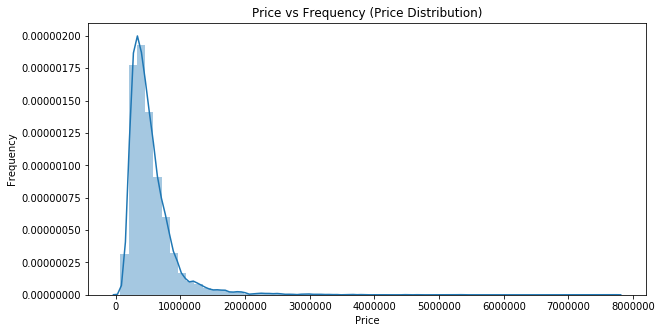

In [19]:
### Target Dependent Variable = Price
# Price vs Count
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(train_df.price, kde=True, bins=60);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');


In [20]:
# Price Distribution is skewed to the right

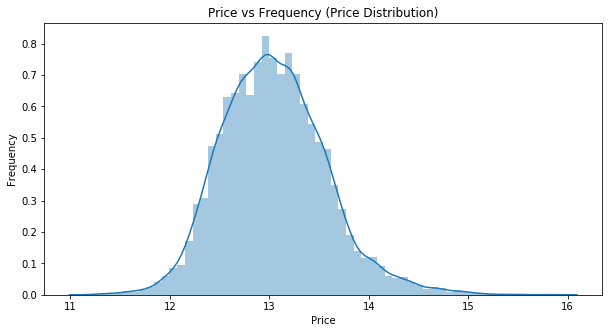

In [21]:
# Log func 
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(np.log(train_df.price), kde=True, bins=60);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');

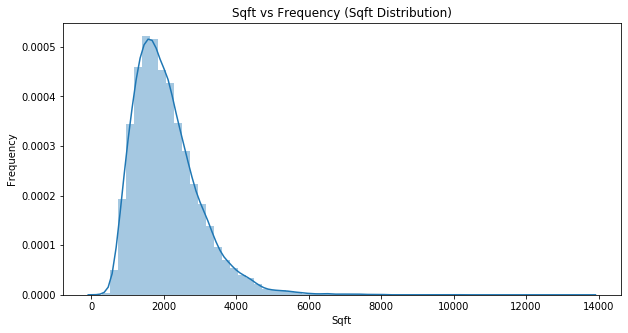

In [22]:
# sqft_living vs price distribution
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(train_df['sqft_living'], kde=True, bins=60);
ax.set(xlabel='Sqft', ylabel='Frequency', title='Sqft vs Frequency (Sqft Distribution)');

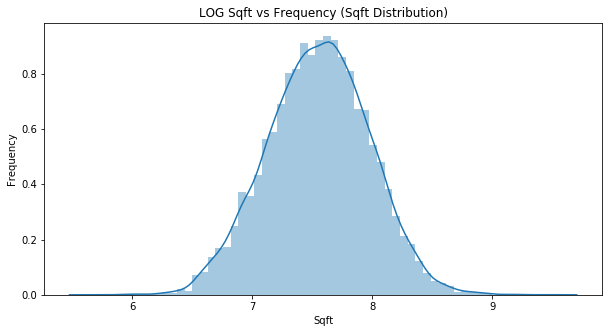

In [23]:
# Log func 
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(np.log(train_df['sqft_living']), kde=True, bins=60);
ax.set(xlabel='Sqft', ylabel='Frequency', title='LOG Sqft vs Frequency (Sqft Distribution)');

In [24]:
# Add a column that runs np.log on train_df['sqft_living']
train_df['log_sqft_living'] = np.where(train_df['sqft_living'], np.log(train_df['sqft_living']), train_df['sqft_living'])

In [25]:
train_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,log_sqft_living
0,365000.0,4,2.25,2070,8893,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,7.635304
1,865000.0,5,3.00,2900,6730,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,7.972466
2,1038000.0,4,2.50,3770,10893,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,8.234830
3,1490000.0,3,3.50,4560,14608,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,8.425078
4,711000.0,3,2.50,2550,5376,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,7.843849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5,2.50,3240,9960,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015,8.083329
17286,440000.0,2,1.75,1300,4000,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014,7.170120
17287,310000.0,3,1.00,1050,9876,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014,6.956545
17288,427500.0,3,1.50,1900,43186,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014,7.549609


In [26]:
# DROP sqft_lot because pvalue shows that it is not significant at 0.274
train_df.drop(columns=['sqft_lot'], axis=1, inplace=True)

In [27]:
all_ind_features_list = [val for val in train_df.columns if val != 'price']
all_ind_features_str = '+'.join(all_ind_features_list)
print (all_ind_features_list)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold', 'log_sqft_living']


In [28]:
mlr_model = smf.ols(formula=f'price~{all_ind_features_str}', data=train_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     2716.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:45:00   Log-Likelihood:            -2.3512e+05
No. Observations:               17290   AIC:                         4.703e+05
Df Residuals:                   17272   BIC:                         4.704e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -4.8e+07   7.13e+06     -6.733      0.000    -6.2e+07    -3.4e+07
bedrooms         -1.24e+04   2088.548     -5.939      0.000   -1.65e+04   -8310.519
bathrooms        5.662e+04   3415.488     16.579      0.000    4.99e+04    6.33e+04
sqft_living       246.5219      3.953     62.356      0.000     238.773     254.271
waterfront       5.796e+05   1.83e+04     31.607      0.000    5.44e+05    6.15e+05
view             4.748e+04   2295.990     20.678      0.000     4.3e+04     5.2e+04
condition        3.456e+04   2540.452     13.603      0.000    2.96e+04    3.95e+04
grade            1.035e+05   2332.578     44.372      0.000    9.89e+04    1.08e+05
sqft_above        131.9526      2.633     50.105      0.000     126.791     137.115
sqft_basement     114.5966      3.150     36.376      0.000     108.422     120.772
yr_built        -2305.0495     76.967    -29.949      0.000   -2455.912   -2154.187
yr_renovated       26.7528      3.965      6.747      0.000      18.981      34.525
zipcode          -574.9575     35.472    -16.209      0.000    -644.486    -505.429
lat              5.987e+05   1.16e+04     51.696      0.000    5.76e+05    6.21e+05
long             -1.99e+05   1.41e+04    -14.142      0.000   -2.27e+05   -1.71e+05
sqft_living15      33.4538      3.711      9.014      0.000      26.179      40.728
sqft_lot15         -0.2531      0.058     -4.401      0.000      -0.366      -0.140
yr_sold          2.921e+04   3177.789      9.191      0.000     2.3e+04    3.54e+04
log_sqft_living -5.306e+05   1.25e+04    -42.423      0.000   -5.55e+05   -5.06e+05
==============================================================================
Omnibus:                    11066.110   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           616740.083
Skew:                           2.400   Prob(JB):                         0.00
Kurtosis:                      31.863   Cond. No.                     3.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
### Pairplot

# sns.pairplot(df)

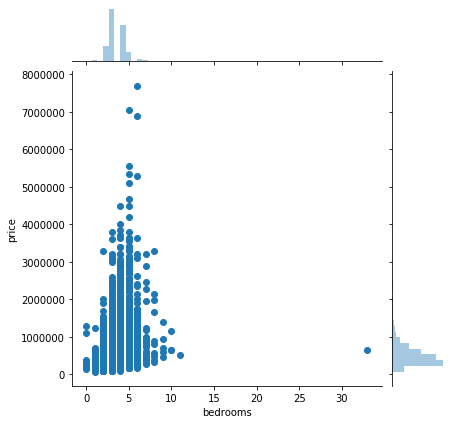

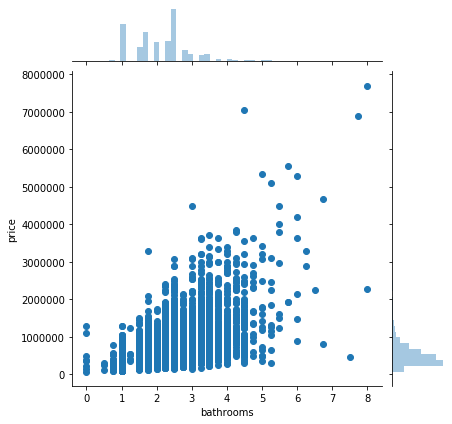

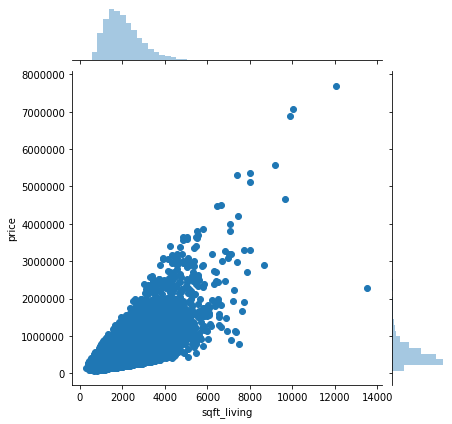

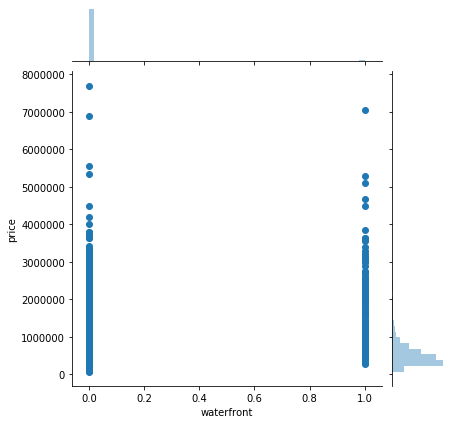

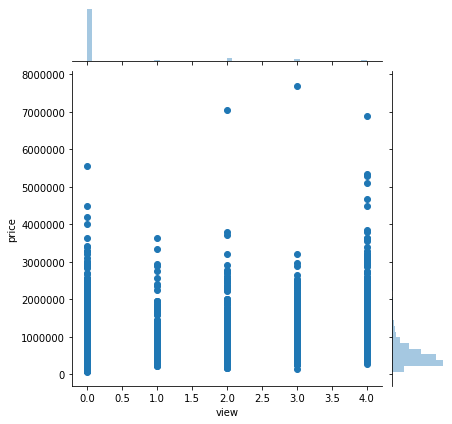

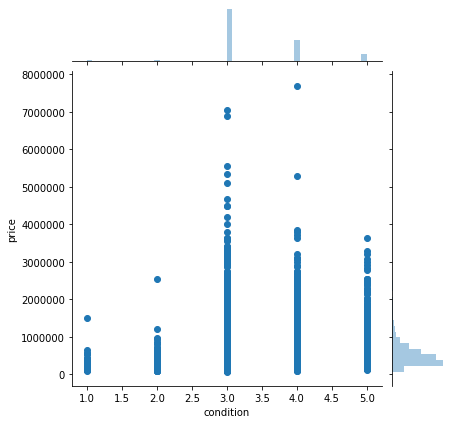

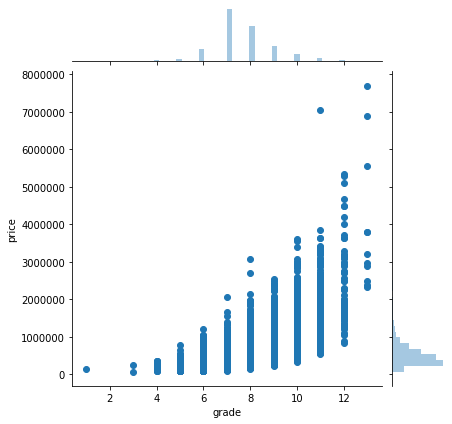

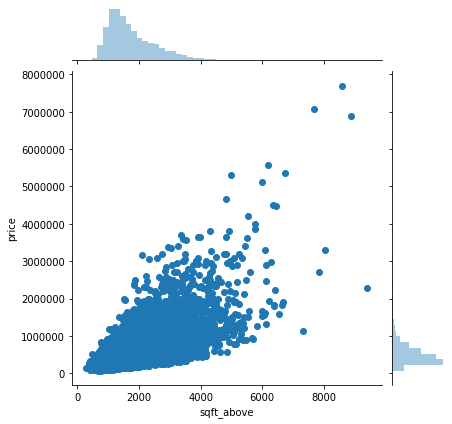

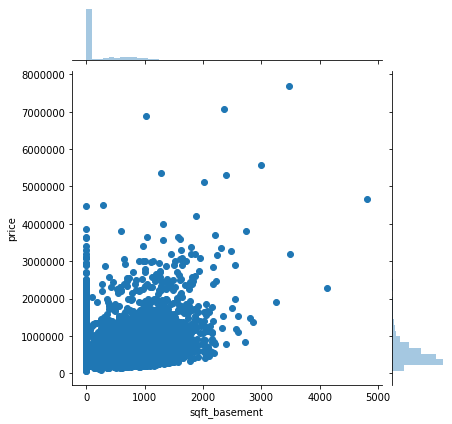

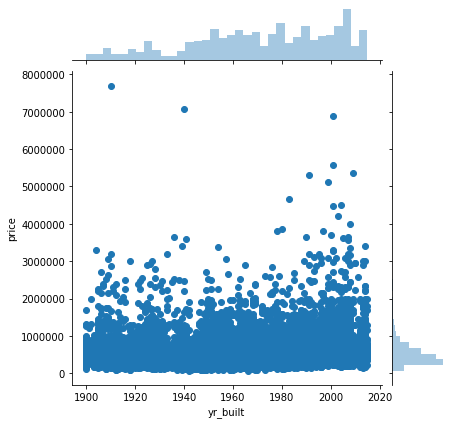

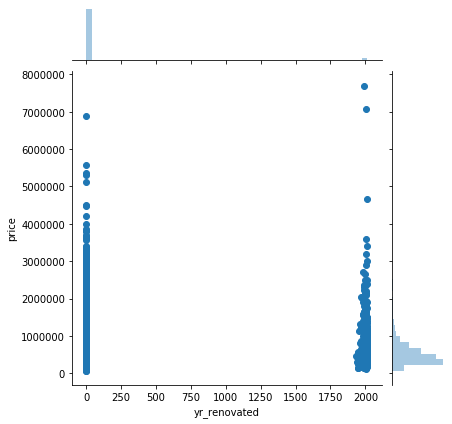

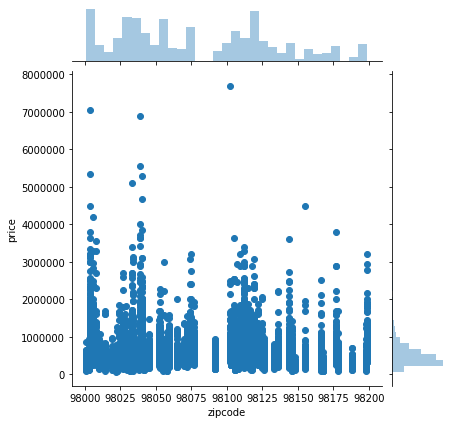

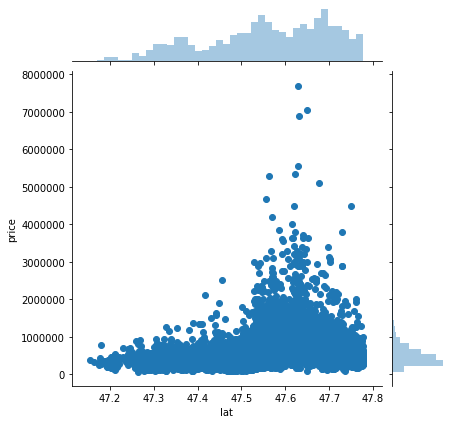

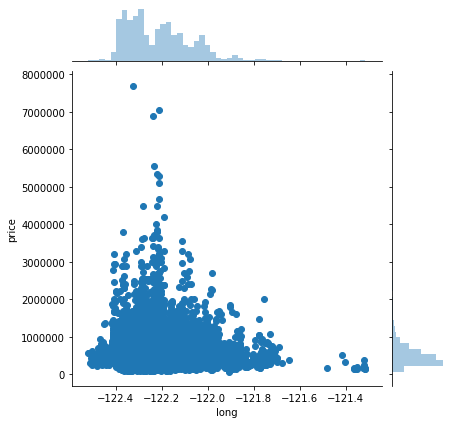

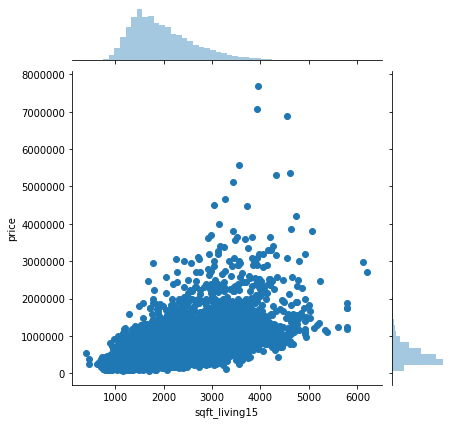

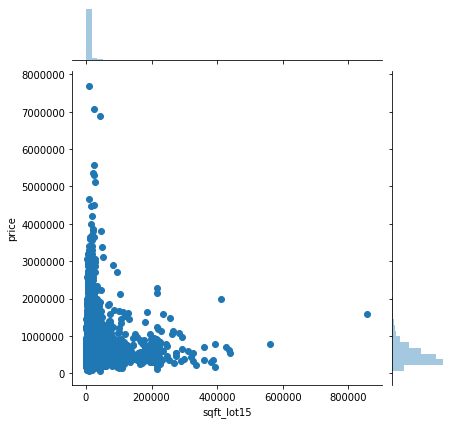

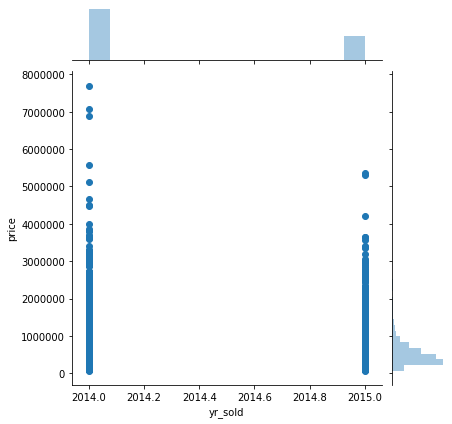

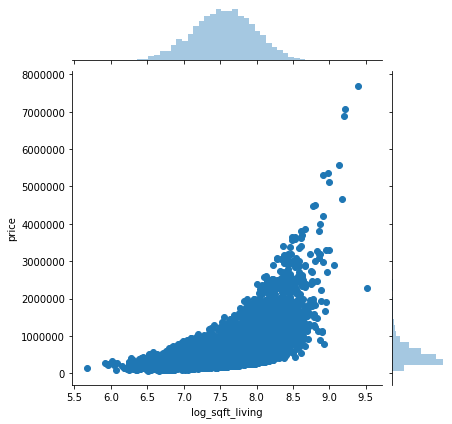

In [30]:
# Graph all graphs for each independent column

for column in all_ind_features_list:
    sns.jointplot(x=column, y='price', data=train_df, kind='scatter');


Looking at the charts, only really clear relationship is shown with column 'sqft_living'

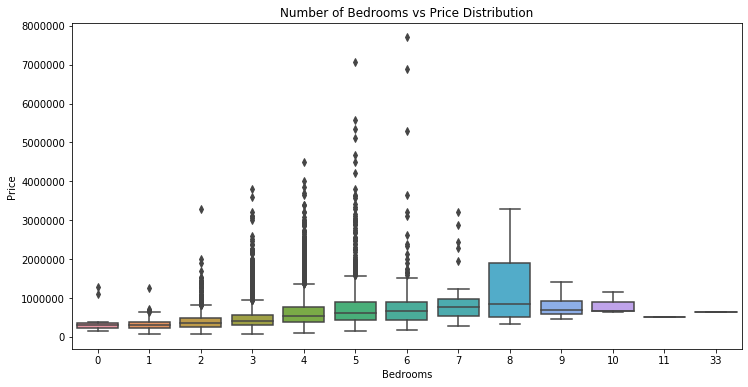

In [31]:
# Bedroom vs Price Distirbution

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='bedrooms', y="price", data=train_df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Number of Bedrooms vs Price Distribution');
# Looking at the boxplot, we know that there is one outlier of 33 rooms that costs very cheap (probably need to drop)
# We also know houses should have more than one bedroom (or is that studio?)

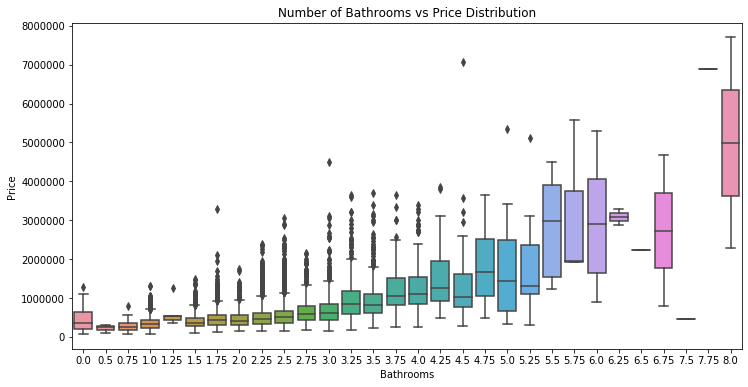

In [32]:
# Bathroom vs Price Distribution

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='bathrooms', y="price", data=train_df)
ax.set(xlabel='Bathrooms', ylabel='Price',title='Number of Bathrooms vs Price Distribution');

# Looking at this graph, we can see that there are houses with 0 bathrooms

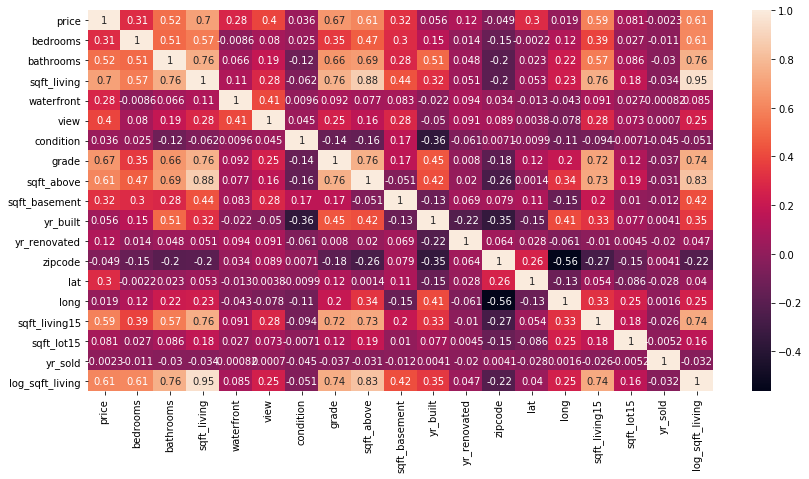

In [33]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(train_df.corr(), annot=True);

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [34]:
# Let's look at the row with 33 bedrooms and row with 7.5 bedroom from graph
train_df[train_df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,log_sqft_living
8597,640000.0,33,1.75,1620,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,7.390181


In [35]:
# How to go at data cleaning:
## Should we drop these outliers?
## Is there such things as 0 bedrooms? Would that count as studio?

In [36]:
# Drop 33 bedrooms outlier
train_df.drop(train_df.loc[train_df['bedrooms'] == 33].index, axis = 0, inplace=True)
train_df.drop(columns=['sqft_living'], inplace=True, axis=1)

In [37]:
# Drop 8 observations with 0 bathrooms because we expect houses to have a bathroom...
# train_df.drop(train_df.loc[train_df['bathrooms'] == 0].index, axis=0, inplace=True)

In [38]:
# df[df['bathrooms'] == 0]

In [39]:
df.waterfront.value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [40]:
# yr_renovated col has alot of 0 as their value. 
train_df['yr_renovated'].value_counts()

0       16563
2014       71
2007       32
2005       32
2000       31
2013       30
2003       28
2006       21
1990       21
1989       21
2004       19
2002       19
1987       16
1999       16
1995       16
1998       15
2010       15
1991       15
1985       15
2009       15
1986       14
1996       14
1993       14
2001       13
1994       13
2008       13
1984       12
1988       12
2015       12
1983       11
1997       10
2012        9
1992        9
2011        8
1980        7
1982        7
1970        7
1979        7
1968        6
1977        6
1975        5
1978        5
1964        4
1973        4
1965        4
1955        3
1953        3
1981        3
1972        3
1976        3
1958        3
1945        3
1960        3
1963        3
1957        2
1962        2
1967        2
1969        2
1950        2
1971        2
1974        2
1940        2
1956        2
1946        2
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, dtype: int64

In [41]:
train_df.waterfront.value_counts()

0    17151
1      138
Name: waterfront, dtype: int64

In [42]:
train_df.head()

,price,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,log_sqft_living
0,365000.0,4,2.25,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,7.635304
1,865000.0,5,3.00,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,7.972466
2,1038000.0,4,2.50,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,8.234830
3,1490000.0,3,3.50,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,8.425078
4,711000.0,3,2.50,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,7.843849


In [43]:
# Create is_renovated column: if house is equal to or older than 2000, then it is renovated.
conditions = [
    train_df['yr_renovated'] < 2000,
    train_df['yr_renovated'] >= 2000
]
choices = [
    0,
    1
]
train_df['is_renovated']=np.select(conditions, choices, train_df['yr_renovated'])
train_df['is_renovated'].value_counts()

0    16921
1      368
Name: is_renovated, dtype: int64

In [44]:
datetime.now().year

2020

In [45]:
# Create yr_old column using yr_built
train_df['yr_old'] = np.where(train_df['yr_built'], datetime.now().year - train_df['yr_built'], train_df['yr_built'])
# train_df['yr_old'].value_counts()

In [46]:
df.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [47]:
# Create is_viewed column where if the house had been viewed 1 time or more, it is true(1)
train_df['view'].value_counts()
train_df['is_viewed'] = np.where(train_df['view'] > 0, 1, 0)
train_df['is_viewed'].value_counts()

0    15570
1     1719
Name: is_viewed, dtype: int64

In [48]:
train_df.head()

,price,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,log_sqft_living,is_renovated,yr_old,is_viewed
0,365000.0,4,2.25,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,7.635304,0,34,0
1,865000.0,5,3.00,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,7.972466,0,43,0
2,1038000.0,4,2.50,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,8.234830,0,23,1
3,1490000.0,3,3.50,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,8.425078,0,30,1
4,711000.0,3,2.50,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,7.843849,0,16,0


In [49]:
# Check for skewness
train_df.skew()

price               4.282546
bedrooms            0.537402
bathrooms           0.536370
waterfront         11.059470
view                3.370203
condition           1.037552
grade               0.775512
sqft_above          1.469476
sqft_basement       1.593976
yr_built           -0.461973
yr_renovated        4.567916
zipcode             0.407314
lat                -0.484901
long                0.892797
sqft_living15       1.114859
sqft_lot15          8.766029
yr_sold             0.756336
log_sqft_living    -0.036215
is_renovated        6.634031
yr_old              0.461973
is_viewed           2.677544
dtype: float64

In [50]:
skewed_cols = ['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

In [51]:
# np.log on skewed_cols
train_df['log_sqft_above'] = np.where(train_df['sqft_above'], np.log(train_df['sqft_above']), train_df['sqft_above'])
train_df['log_sqft_basement'] = np.where(train_df['sqft_basement'], np.log(train_df['sqft_basement']), train_df['sqft_basement'])
train_df['log_sqft_living15'] = np.where(train_df['sqft_living15'], np.log(train_df['sqft_living15']), train_df['sqft_living15'])
# train_df['log_sqft_lot15'] = np.where(train_df['sqft_lot15'], np.log(train_df['sqft_lot15']), train_df['sqft_lot15'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
#drop cols that were skewed and did log transformation
train_df.drop(columns=skewed_cols, axis=1, inplace=True)

In [53]:
# check to see if dropped
train_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'yr_sold', 'log_sqft_living', 'is_renovated', 'yr_old', 'is_viewed', 'log_sqft_above', 'log_sqft_basement', 'log_sqft_living15'], dtype='object')

In [54]:
# yr_built and yr_old has correlation value of -1, so I will drop yr_built due to multicollinearity
train_df.drop(columns=['yr_built'], inplace=True, axis=1)

In [55]:
# correlation
train_df.corr()

,price,bedrooms,bathrooms,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long,yr_sold,log_sqft_living,is_renovated,yr_old,is_viewed,log_sqft_above,log_sqft_basement,log_sqft_living15
price,1.000000,0.313783,0.524346,0.275781,0.395492,0.036068,0.666231,0.117774,-0.048966,0.302388,0.019341,-0.002324,0.608975,0.106585,-0.056464,0.354494,0.541383,0.204581,0.542909
bedrooms,0.313783,1.000000,0.524028,-0.008671,0.082717,0.021438,0.366397,0.014484,-0.152822,-0.003970,0.129577,-0.010228,0.633859,0.033645,-0.159920,0.082172,0.526884,0.199364,0.414661
bathrooms,0.524346,0.524028,1.000000,0.065846,0.188810,-0.122931,0.664186,0.048134,-0.201517,0.023099,0.221292,-0.030064,0.761051,0.069981,-0.507752,0.176626,0.694594,0.189865,0.569047
waterfront,0.275781,-0.008671,0.065846,1.000000,0.407565,0.009622,0.092232,0.094267,0.034285,-0.013326,-0.042733,-0.000827,0.084517,0.027303,0.021986,0.269961,0.065384,0.046099,0.083236
view,0.395492,0.082717,0.188810,0.407565,1.000000,0.045111,0.249547,0.091288,0.089484,0.003836,-0.077589,0.000688,0.245972,0.035265,0.049608,0.926033,0.155546,0.207139,0.263760
condition,0.036068,0.021438,-0.122931,0.009622,0.045111,1.000000,-0.142013,-0.060950,0.007004,-0.010060,-0.109104,-0.044781,-0.051235,-0.082646,0.358875,0.046586,-0.148357,0.146081,-0.091143
grade,0.666231,0.366397,0.664186,0.092232,0.249547,-0.142013,1.000000,0.007981,-0.184934,0.116229,0.198348,-0.036583,0.744540,0.031098,-0.447990,0.233817,0.745493,0.069381,0.690846
yr_renovated,0.117774,0.014484,0.048134,0.094267,0.091288,-0.060950,0.007981,1.000000,0.063647,0.027816,-0.061170,-0.019515,0.046571,0.708755,0.222682,0.078749,0.022496,0.055095,-0.012789
zipcode,-0.048966,-0.152822,-0.201517,0.034285,0.089484,0.007004,-0.184934,0.063647,1.000000,0.264696,-0.563019,0.004159,-0.217620,0.049513,0.348353,0.096260,-0.287913,0.153602,-0.284660
lat,0.302388,-0.003970,0.023099,-0.013326,0.003836,-0.010060,0.116229,0.027816,0.264696,1.000000,-0.131476,-0.027665,0.039922,0.023340,0.145183,0.006495,-0.016085,0.130358,0.048041


In [56]:
all_ind_features_list = [val for val in train_df.columns if val != 'price']
all_ind_features_str = '+'.join(all_ind_features_list)
print (all_ind_features_list)

['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long', 'yr_sold', 'log_sqft_living', 'is_renovated', 'yr_old', 'is_viewed', 'log_sqft_above', 'log_sqft_basement', 'log_sqft_living15']


In [57]:
mlr_model = smf.ols(formula=f'price~{all_ind_features_str}', data=train_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1881.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:45:30   Log-Likelihood:            -2.3697e+05
No. Observations:               17289   AIC:                         4.740e+05
Df Residuals:                   17270   BIC:                         4.741e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.254e+07   7.93e+06     -6.629      0.000   -6.81e+07    -3.7e+07
bedrooms          -1.741e+04   2449.365     -7.109      0.000   -2.22e+04   -1.26e+04
bathrooms          8.946e+04   3786.521     23.626      0.000     8.2e+04    9.69e+04
waterfront         6.153e+05   2.15e+04     28.641      0.000    5.73e+05    6.57e+05
view               7.362e+04   6294.375     11.696      0.000    6.13e+04     8.6e+04
condition           2.72e+04   2831.300      9.608      0.000    2.17e+04    3.28e+04
grade               1.34e+05   2522.659     53.106      0.000    1.29e+05    1.39e+05
yr_renovated        -14.6822      6.064     -2.421      0.015     -26.568      -2.796
zipcode            -546.8437     39.560    -13.823      0.000    -624.385    -469.303
lat                5.873e+05   1.29e+04     45.587      0.000    5.62e+05    6.13e+05
long              -1.538e+05   1.54e+04     -9.973      0.000   -1.84e+05   -1.24e+05
yr_sold            2.822e+04   3540.129      7.972      0.000    2.13e+04    3.52e+04
log_sqft_living   -1.198e+05   1.99e+04     -6.026      0.000   -1.59e+05   -8.08e+04
is_renovated       1.129e+05   1.63e+04      6.912      0.000    8.09e+04    1.45e+05
yr_old             3277.2489     84.211     38.917      0.000    3112.187    3442.311
is_viewed         -3.525e+04   1.55e+04     -2.280      0.023   -6.56e+04   -4946.535
log_sqft_above     2.743e+05   1.92e+04     14.298      0.000    2.37e+05    3.12e+05
log_sqft_basement  1.516e+04   1340.204     11.314      0.000    1.25e+04    1.78e+04
log_sqft_living15  7.377e+04   8393.738      8.788      0.000    5.73e+04    9.02e+04
==============================================================================
Omnibus:                    17913.156   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3511816.860
Skew:                           4.763   Prob(JB):                         0.00
Kurtosis:                      72.168   Cond. No.                     4.71e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [58]:
# zipcode is a categorical variable -> so I want to use pd.get_dummies() dummy variables
train_df = pd.concat([train_df, pd.get_dummies(train_df['zipcode'], drop_first=True)], axis=1)
train_df.drop('zipcode', axis=1, inplace=True)
train_df.head()

,price,bedrooms,bathrooms,waterfront,view,condition,grade,yr_renovated,lat,long,yr_sold,log_sqft_living,is_renovated,yr_old,is_viewed,log_sqft_above,log_sqft_basement,log_sqft_living15,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,365000.0,4,2.25,0,0,4,8,0,47.4388,-122.162,2014,7.635304,0,34,0,7.635304,0.000000,7.779049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5,3.00,0,0,5,8,0,47.6784,-122.285,2014,7.972466,0,43,0,7.512071,6.975414,7.770645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,4,2.50,0,2,3,11,0,47.5646,-122.129,2014,8.234830,0,23,1,8.234830,0.000000,8.218787,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,3,3.50,0,2,3,12,0,47.6995,-122.228,2015,8.425078,0,30,1,8.425078,0.000000,8.306472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,3,2.50,0,0,3,9,0,47.6647,-122.083,2014,7.843849,0,16,0,7.843849,0.000000,7.718685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
train_df.condition.value_counts()

3    11244
4     4516
5     1366
2      139
1       24
Name: condition, dtype: int64

In [60]:
train_df.grade.value_counts()

7     7182
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [61]:
# could be multicollinearity
train_df.yr_renovated.value_counts()

0       16563
2014       71
2007       32
2005       32
2000       31
2013       30
2003       28
2006       21
1990       21
1989       21
2004       19
2002       19
1987       16
1999       16
1995       16
1998       15
2010       15
1991       15
1985       15
2009       15
1986       14
1996       14
1993       14
2001       13
1994       13
2008       13
1984       12
1988       12
2015       12
1983       11
1997       10
2012        9
1992        9
2011        8
1980        7
1982        7
1970        7
1979        7
1968        6
1977        6
1975        5
1978        5
1964        4
1973        4
1965        4
1955        3
1953        3
1981        3
1972        3
1976        3
1958        3
1945        3
1960        3
1963        3
1957        2
1962        2
1967        2
1969        2
1950        2
1971        2
1974        2
1940        2
1956        2
1946        2
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, dtype: int64

In [62]:
train_df.is_renovated.value_counts()

0    16921
1      368
Name: is_renovated, dtype: int64

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [63]:
# Date could be useful in the sense that I can see by seasons to see when the houses are sold more or could use it by year

# Later: convert date to yr_sold(yearly), mon_sold(maybe season)

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [64]:
# looking at yr_built and yr_renovated, I created yr_old using yr_built and is_renovated using yr_renovated


### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [65]:
train_df[train_df.columns[1:]]

,bedrooms,bathrooms,waterfront,view,condition,grade,yr_renovated,lat,long,yr_sold,log_sqft_living,is_renovated,yr_old,is_viewed,log_sqft_above,log_sqft_basement,log_sqft_living15,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,4,2.25,0,0,4,8,0,47.4388,-122.162,2014,7.635304,0,34,0,7.635304,0.000000,7.779049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3.00,0,0,5,8,0,47.6784,-122.285,2014,7.972466,0,43,0,7.512071,6.975414,7.770645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,2.50,0,2,3,11,0,47.5646,-122.129,2014,8.234830,0,23,1,8.234830,0.000000,8.218787,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3.50,0,2,3,12,0,47.6995,-122.228,2015,8.425078,0,30,1,8.425078,0.000000,8.306472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2.50,0,0,3,9,0,47.6647,-122.083,2014,7.843849,0,16,0,7.843849,0.000000,7.718685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5,2.50,0,1,3,8,0,47.5858,-122.112,2015,8.083329,0,62,1,7.610853,7.106606,7.912057,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,2,1.75,0,0,3,7,0,47.6687,-122.288,2014,7.170120,0,72,0,7.170120,0.000000,7.207860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,3,1.00,0,0,3,7,0,47.7635,-122.262,2014,6.956545,0,67,0,6.956545,0.000000,7.473069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,3,1.50,0,0,4,7,0,47.4199,-121.990,2014,7.549609,0,49,0,7.170120,6.396930,7.640123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
# Linear Regression Model:
from sklearn.linear_model import LinearRegression
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(train_df[train_df.columns[1:]], train_df['price'])
#access output
print('intercept:', lm.intercept_)
print('multiple coefficients', lm.coef_)
print("R^2: ", lm.score(train_df[train_df.columns[1:]], train_df['price']))

intercept: -69813855.06706744
multiple coefficients [-1.37789933e+04  6.38413227e+04  6.46779980e+05  9.59787007e+04
  2.47495380e+04  9.54119832e+04 -1.69696649e+01  2.37709230e+05
  6.56017778e+03  2.82077138e+04 -2.95899115e+04  9.38836709e+04
  1.85785306e+03 -8.90851566e+04  2.38810945e+05  9.97632938e+03
  4.47396891e+04  3.01073750e+04 -3.06234480e+04  7.39347819e+05
  2.11667022e+05  2.04340108e+05  1.44068879e+05  1.56733773e+05
  8.73413064e+04  9.77927220e+03  6.01985016e+04 -1.30682154e+04
  1.46929875e+04 -4.08669585e+04  1.44862580e+05  1.09810329e+05
  5.88303480e+03  1.05476801e+05 -2.86549845e+04 -2.40520325e+04
 -7.13636191e+03  2.65852900e+05  9.16671042e+04  1.30902021e+04
  1.34312567e+06  4.40418805e+05 -4.93653728e+03  6.28469440e+04
  1.21903342e+05  1.42120401e+05 -2.19741056e+03  5.17352350e+04
 -6.69005215e+03  4.94974235e+04  4.63269359e+04 -1.74141894e+04
  4.57230316e+04  8.96913260e+04  1.05496246e+05  3.43284974e+04
 -4.17559232e+04  3.63887397e+05  1.91

In [67]:
train_df.columns[1:]

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'lat', 'long', 'yr_sold', 'log_sqft_living', 'is_renovated', 'yr_old', 'is_viewed', 'log_sqft_above', 'log_sqft_basement', 'log_sqft_living15', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype='object')

In [68]:
# Convert zipcode columns into str because poly func does not take int as col

train_df.columns = train_df.columns.map(lambda x: 'zip_' + str(x) if type(x) != str else x)

In [69]:
from sklearn.preprocessing import PolynomialFeatures
df_features = train_df[train_df.columns[1:]]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
print(poly_data)
print(df_features.columns)
poly_columns = poly.get_feature_names(df_features.columns)

[[4.   2.25 0.   ... 0.   0.   0.  ]
 [5.   3.   0.   ... 0.   0.   0.  ]
 [4.   2.5  0.   ... 0.   0.   0.  ]
 ...
 [3.   1.   0.   ... 0.   0.   0.  ]
 [3.   1.5  0.   ... 0.   0.   0.  ]
 [3.   1.5  0.   ... 0.   0.   0.  ]]
Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'lat', 'long', 'yr_sold', 'log_sqft_living', 'is_renovated', 'yr_old', 'is_viewed', 'log_sqft_above', 'log_sqft_basement', 'log_sqft_living15', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zi

In [70]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [71]:
df_poly

,bedrooms,bathrooms,waterfront,view,condition,grade,yr_renovated,lat,long,yr_sold,log_sqft_living,is_renovated,yr_old,is_viewed,log_sqft_above,log_sqft_basement,log_sqft_living15,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,bedrooms^2,bedrooms bathrooms,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms yr_renovated,bedrooms lat,bedrooms long,bedrooms yr_sold,bedrooms log_sqft_living,bedrooms is_renovated,bedrooms yr_old,bedrooms is_viewed,bedrooms log_sqft_above,bedrooms log_sqft_basement,bedrooms log_sqft_living15,bedrooms zip_98002,bedrooms zip_98003,bedrooms zip_98004,bedrooms zip_98005,bedrooms zip_98006,bedrooms zip_98007,bedrooms zip_98008,bedrooms zip_98010,bedrooms zip_98011,bedrooms zip_98014,bedrooms zip_98019,bedrooms zip_98022,bedrooms zip_98023,bedrooms zip_98024,bedrooms zip_98027,bedrooms zip_98028,bedrooms zip_98029,bedrooms zip_98030,bedrooms zip_98031,bedrooms zip_98032,bedrooms zip_98033,bedrooms zip_98034,bedrooms zip_98038,bedrooms zip_98039,bedrooms zip_98040,bedrooms zip_98042,bedrooms zip_98045,bedrooms zip_98052,bedrooms zip_98053,bedrooms zip_98055,bedrooms zip_98056,bedrooms zip_98058,bedrooms zip_98059,bedrooms zip_98065,bedrooms zip_98070,bedrooms zip_98072,bedrooms zip_98074,bedrooms zip_98075,bedrooms zip_98077,bedrooms zip_98092,bedrooms zip_98102,bedrooms zip_98103,bedrooms zip_98105,bedrooms zip_98106,bedrooms zip_98107,bedrooms zip_98108,bedrooms zip_98109,bedrooms zip_98112,bedrooms zip_98115,bedrooms zip_98116,bedrooms zip_98117,bedrooms zip_98118,bedrooms zip_98119,bedrooms zip_98122,bedrooms zip_98125,bedrooms zip_98126,bedrooms zip_98133,bedrooms zip_98136,bedrooms zip_98144,bedrooms zip_98146,bedrooms zip_98148,bedrooms zip_98155,bedrooms zip_98166,bedrooms zip_98168,bedrooms zip_98177,bedrooms zip_98178,bedrooms zip_98188,bedrooms zip_98198,bedrooms zip_98199,bathrooms^2,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms yr_renovated,bathrooms lat,bathrooms long,bathrooms yr_sold,bathrooms log_sqft_living,bathrooms is_renovated,bathrooms yr_old,bathrooms is_viewed,bathrooms log_sqft_above,bathrooms log_sqft_basement,bathrooms log_sqft_living15,bathrooms zip_98002,bathrooms zip_98003,bathrooms zip_98004,bathrooms zip_98005,bathrooms zip_98006,bathrooms zip_98007,bathrooms zip_98008,bathrooms zip_98010,bathrooms zip_98011,bathrooms zip_98014,bathrooms zip_98019,bathrooms zip_98022,bathrooms zip_98023,bathrooms zip_98024,bathrooms zip_98027,bathrooms zip_98028,bathrooms zip_98029,bathrooms zip_98030,bathrooms zip_98031,bathrooms zip_98032,bathrooms zip_98033,bathrooms zip_98034,bathrooms zip_98038,bathrooms zip_98039,bathrooms zip_98040,bathrooms zip_98042,bathrooms zip_98045,bathrooms zip_98052,bathrooms zip_98053,bathrooms zip_98055,bathrooms zip_98056,bathrooms zip_98058,bathrooms zip_98059,bathrooms zip_98065,bathrooms zip_98070,bathrooms zip_98072,bathrooms zip_98074,bathrooms zip_98075,bathrooms zip_98077,bathrooms zip_98092,bathrooms zip_98102,bathrooms zip_98103,bathrooms zip_98105,bathrooms zip_98106,bathrooms zip_98107,bathrooms zip_98108,bathrooms zip_98109,bathrooms zip_98112,bathrooms zip_98115,bathrooms zip_98116,bathrooms zip_98117,bathrooms zip_98118,bathrooms zip_98119,bathrooms zip_98122,bathrooms zip_98125,bathrooms zip_98126,bathrooms zip_98133,bathrooms zip_98136,bathrooms zip_9

In [72]:
# Linear Regression Model with poly:
from sklearn.linear_model import LinearRegression
#instantiate a linear regression object
lm_poly = LinearRegression()

#fit the linear regression to the data
lm_poly = lm_poly.fit(df_poly, train_df['price'])
#access output
print('intercept:', lm_poly.intercept_)
print('multiple coefficients', lm_poly.coef_)
print("R^2: ", lm_poly.score(df_poly, train_df['price']))

intercept: 15201722874.963936
multiple coefficients [ -2556261.53832293 -42646398.08353416 -95281451.97013147 ...
  -4268220.38324189         0.         -19832687.18939443]
R^2:  0.9213264824785614


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [73]:
from sklearn.model_selection import train_test_split

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly, train_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_poly_train.shape)
print("Test set - Features: ", X_poly_test.shape, "Target: ",y_poly_test.shape)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_poly_train) ## Learned the mean and std  -> standarize our values

scaler.fit(X_poly_test)


#transform the training data
X_poly_train = pd.DataFrame(data=scaler.transform(X_poly_train), columns=df_poly.columns)

#transform the testing data
X_poly_test = pd.DataFrame(data=scaler.transform(X_poly_test), columns=df_poly.columns)
print(X_poly_train.shape, X_poly_test.shape)



lm_poly_2 = LinearRegression()

#fit the linear regression to the data
lm_poly_2 = lm_poly_2.fit(X_poly_train, y_poly_train)
lm_poly_2



y_poly_train_pred = lm_poly_2.predict(X_poly_train)
y_poly_test_pred = lm_poly_2.predict(X_poly_test)
y_poly_train_pred


#instantiate a linear regression object
from sklearn import metrics

train_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_train, y_poly_train_pred))
test_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_test, y_poly_test_pred))

print('Training Root Mean Squared Error:' , train_poly_rmse)
print('Test Root mean Sqaured Erro:', test_poly_rmse)


### R SQUARED
print('R-SQUARED:', lm_poly_2.score(X_poly_train, y_poly_train), lm_poly_2.score(X_poly_test, y_poly_test))



Training set - Features:  (13831, 3827) Target:  (13831,)
Test set - Features:  (3458, 3827) Target:  (3458,)
(13831, 3827) (3458, 3827)
Training Root Mean Squared Error: 101774.05431623991
Test Root mean Sqaured Erro: 1361296910457248.5
R-SQUARED: 0.9258392658630982 -1.3414737127336016e+19


### 5.2) Fit your scaler to training the data.

### 5.3) Transform the testing set with the scaler.

### 5.4) Fit the model to the training data.

### 5.5) Use the model to predict on the training set and the test set.

### 5.6) Evaluate the training and test predictions using RMSE.

### 5.7) Determine if your model is overfit.

In [74]:
# Normal linear regression!

In [75]:
ind_train_df = train_df[train_df.columns[1:]]
ind_train_df

,bedrooms,bathrooms,waterfront,view,condition,grade,yr_renovated,lat,long,yr_sold,log_sqft_living,is_renovated,yr_old,is_viewed,log_sqft_above,log_sqft_basement,log_sqft_living15,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,4,2.25,0,0,4,8,0,47.4388,-122.162,2014,7.635304,0,34,0,7.635304,0.000000,7.779049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3.00,0,0,5,8,0,47.6784,-122.285,2014,7.972466,0,43,0,7.512071,6.975414,7.770645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,2.50,0,2,3,11,0,47.5646,-122.129,2014,8.234830,0,23,1,8.234830,0.000000,8.218787,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3.50,0,2,3,12,0,47.6995,-122.228,2015,8.425078,0,30,1,8.425078,0.000000,8.306472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2.50,0,0,3,9,0,47.6647,-122.083,2014,7.843849,0,16,0,7.843849,0.000000,7.718685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5,2.50,0,1,3,8,0,47.5858,-122.112,2015,8.083329,0,62,1,7.610853,7.106606,7.912057,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,2,1.75,0,0,3,7,0,47.6687,-122.288,2014,7.170120,0,72,0,7.170120,0.000000,7.207860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,3,1.00,0,0,3,7,0,47.7635,-122.262,2014,6.956545,0,67,0,6.956545,0.000000,7.473069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,3,1.50,0,0,4,7,0,47.4199,-121.990,2014,7.549609,0,49,0,7.170120,6.396930,7.640123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
# norm linear regression model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ind_train_df, train_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

from sklearn.preprocessing import StandardScaler


#### selecting helpful columns
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=86)
selector.fit(X_train, y_train)
selected_col = X_train.columns[selector.get_support()]
# removed_col = X_poly_train.columns[~selector.get_support()]
X_train = X_train[selected_col]
X_test = X_test[selected_col]


scaler_normal = StandardScaler()


# fit the scaler to the training data
scaler_normal.fit(X_train) ## Learned the mean and std  -> standarize our values

#transform the training data
X_train = pd.DataFrame(data=scaler_normal.transform(X_train), columns=ind_train_df.columns)


#transform the testing data
X_test = pd.DataFrame(data=scaler_normal.transform(X_test), columns=ind_train_df.columns)
print(X_train.shape, X_test.shape)

lm_norm = LinearRegression()

#fit the linear regression to the data
lm_norm = lm_norm.fit(X_train, y_train)

# how to determine if your model is overfit?
y_train_pred = lm_norm.predict(X_train)
y_test_pred = lm_norm.predict(X_test)

#instantiate a linear regression object
from sklearn import metrics

train_norm_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_norm_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_norm_rmse)
print('Test Root Mean Squared Error:' , test_norm_rmse)
print('R-SQUARED: (train)', lm_norm.score(X_train, y_train), '(test)', lm_norm.score(X_test, y_test))

Training set - Features:  (13831, 86) Target:  (13831,)
Training set - Features:  (3458, 86) Target:  (3458,)
(13831, 86) (3458, 86)
Training Root Mean Squared Error: 181590.50410624995
Test Root Mean Squared Error: 176924.8558632918
R-SQUARED: (train) 0.7639053544806438 (test) 0.7734030030441983


In [77]:
df_poly

,bedrooms,bathrooms,waterfront,view,condition,grade,yr_renovated,lat,long,yr_sold,log_sqft_living,is_renovated,yr_old,is_viewed,log_sqft_above,log_sqft_basement,log_sqft_living15,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,bedrooms^2,bedrooms bathrooms,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms yr_renovated,bedrooms lat,bedrooms long,bedrooms yr_sold,bedrooms log_sqft_living,bedrooms is_renovated,bedrooms yr_old,bedrooms is_viewed,bedrooms log_sqft_above,bedrooms log_sqft_basement,bedrooms log_sqft_living15,bedrooms zip_98002,bedrooms zip_98003,bedrooms zip_98004,bedrooms zip_98005,bedrooms zip_98006,bedrooms zip_98007,bedrooms zip_98008,bedrooms zip_98010,bedrooms zip_98011,bedrooms zip_98014,bedrooms zip_98019,bedrooms zip_98022,bedrooms zip_98023,bedrooms zip_98024,bedrooms zip_98027,bedrooms zip_98028,bedrooms zip_98029,bedrooms zip_98030,bedrooms zip_98031,bedrooms zip_98032,bedrooms zip_98033,bedrooms zip_98034,bedrooms zip_98038,bedrooms zip_98039,bedrooms zip_98040,bedrooms zip_98042,bedrooms zip_98045,bedrooms zip_98052,bedrooms zip_98053,bedrooms zip_98055,bedrooms zip_98056,bedrooms zip_98058,bedrooms zip_98059,bedrooms zip_98065,bedrooms zip_98070,bedrooms zip_98072,bedrooms zip_98074,bedrooms zip_98075,bedrooms zip_98077,bedrooms zip_98092,bedrooms zip_98102,bedrooms zip_98103,bedrooms zip_98105,bedrooms zip_98106,bedrooms zip_98107,bedrooms zip_98108,bedrooms zip_98109,bedrooms zip_98112,bedrooms zip_98115,bedrooms zip_98116,bedrooms zip_98117,bedrooms zip_98118,bedrooms zip_98119,bedrooms zip_98122,bedrooms zip_98125,bedrooms zip_98126,bedrooms zip_98133,bedrooms zip_98136,bedrooms zip_98144,bedrooms zip_98146,bedrooms zip_98148,bedrooms zip_98155,bedrooms zip_98166,bedrooms zip_98168,bedrooms zip_98177,bedrooms zip_98178,bedrooms zip_98188,bedrooms zip_98198,bedrooms zip_98199,bathrooms^2,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms yr_renovated,bathrooms lat,bathrooms long,bathrooms yr_sold,bathrooms log_sqft_living,bathrooms is_renovated,bathrooms yr_old,bathrooms is_viewed,bathrooms log_sqft_above,bathrooms log_sqft_basement,bathrooms log_sqft_living15,bathrooms zip_98002,bathrooms zip_98003,bathrooms zip_98004,bathrooms zip_98005,bathrooms zip_98006,bathrooms zip_98007,bathrooms zip_98008,bathrooms zip_98010,bathrooms zip_98011,bathrooms zip_98014,bathrooms zip_98019,bathrooms zip_98022,bathrooms zip_98023,bathrooms zip_98024,bathrooms zip_98027,bathrooms zip_98028,bathrooms zip_98029,bathrooms zip_98030,bathrooms zip_98031,bathrooms zip_98032,bathrooms zip_98033,bathrooms zip_98034,bathrooms zip_98038,bathrooms zip_98039,bathrooms zip_98040,bathrooms zip_98042,bathrooms zip_98045,bathrooms zip_98052,bathrooms zip_98053,bathrooms zip_98055,bathrooms zip_98056,bathrooms zip_98058,bathrooms zip_98059,bathrooms zip_98065,bathrooms zip_98070,bathrooms zip_98072,bathrooms zip_98074,bathrooms zip_98075,bathrooms zip_98077,bathrooms zip_98092,bathrooms zip_98102,bathrooms zip_98103,bathrooms zip_98105,bathrooms zip_98106,bathrooms zip_98107,bathrooms zip_98108,bathrooms zip_98109,bathrooms zip_98112,bathrooms zip_98115,bathrooms zip_98116,bathrooms zip_98117,bathrooms zip_98118,bathrooms zip_98119,bathrooms zip_98122,bathrooms zip_98125,bathrooms zip_98126,bathrooms zip_98133,bathrooms zip_98136,bathrooms zip_9

In [78]:
######## Using the Feature Selection Question 6: #########


from sklearn.preprocessing import PolynomialFeatures
df_features = train_df[train_df.columns[1:]]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)



df_poly = pd.DataFrame(poly_data, columns=poly_columns)

from sklearn.model_selection import train_test_split

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly, train_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_poly_train.shape)
print("Test set - Features: ", X_poly_test.shape, "Target: ",y_poly_test.shape)


#### selecting helpful columns
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=50)
selector.fit(X_poly_train, y_poly_train)
selected_col = X_poly_train.columns[selector.get_support()]
# removed_col = X_poly_train.columns[~selector.get_support()]
X_poly_train = X_poly_train[selected_col]
X_poly_test = X_poly_test[selected_col]


#### scaler

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_poly_train) ## Learned the mean and std  -> standarize our values

scaler.fit(X_poly_test)



#transform the training data
X_poly_train = pd.DataFrame(data=scaler.transform(X_poly_train), columns=X_poly_train.columns)

#transform the testing data
X_poly_test = pd.DataFrame(data=scaler.transform(X_poly_test), columns=X_poly_train.columns)
print(X_poly_train.shape, X_poly_test.shape)



lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_poly_train, y_poly_train)



y_poly_train_pred = lm.predict(X_poly_train)
y_poly_test_pred = lm.predict(X_poly_test)



#instantiate a linear regression object
from sklearn import metrics

train_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_train, y_poly_train_pred))
test_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_test, y_poly_test_pred))

print('Training Root Mean Squared Error:' , train_poly_rmse)
print('Test Root mean Sqaured Erro:', test_poly_rmse)

#R squared
print(lm.score(X_poly_test, y_poly_test))
print(lm.score(X_poly_train, y_poly_train))



Training set - Features:  (13831, 3827) Target:  (13831,)
Test set - Features:  (3458, 3827) Target:  (3458,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


(13831, 50) (3458, 50)
Training Root Mean Squared Error: 192757.80794467393
Test Root mean Sqaured Erro: 198237.39078883675
0.715522714831815
0.7339741577902089


In [79]:
### LASSO ###

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.3, normalize=False)

lasso.fit(X_train,y_train)

y_train_lasso01 = lasso.predict(X_train)
y_test_lasso01 = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_lasso01)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_lasso01))
print('Training Error: '+ str(train_rmse_lasso01))
print('Testing Error: '+ str(test_rmse_lasso01) )
print('Rsquared train:', lasso.score(X_train, y_train),'Rsquared test', lasso.score(X_test, y_test))

Training Error: 103954.4253042365
Testing Error: 176924.7955779064
Rsquared train: 0.7639053250964295 Rsquared test 0.7734031574655191


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115662409996336.52, tolerance: 193176241565.7124
  positive)


In [81]:
#### KBEST

In [82]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
selected_columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'grade', 'yr_renovated', 'lat', 'log_sqft_living', 'is_renovated', 'is_viewed', 'log_sqft_above', 'log_sqft_basement', 'log_sqft_living15', 'zip_98004', 'zip_98006', 'zip_98023', 'zip_98033', 'zip_98039', 'zip_98040', 'zip_98112'], dtype='object')

In [83]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)



Training Root Mean Squared Error: 203329.04897515444
Testing Root Mean Squared Error: 200297.7185893648


In [84]:
def convert_date(df):
    df.date = df.apply(lambda x: x[:8])
    df['yr_sold'] = df.date.apply(lambda x: datetime.strptime(x, "%Y%m%d").year)


## Step 8:  Refit your best model to the entire dataset

In [85]:
test_df = pd.read_csv('kc_house_data_test_features.csv',index_col=0)
test_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [86]:
## DATA CLEANING:
def clean_data(test_df):
    test_df.date = test_df.date.apply(lambda x: x[0:8])
    test_df['yr_sold'] = test_df.date.apply(lambda x: datetime.strptime(x, "%Y%m%d").year)
    test_df = test_df.drop(axis=1, columns=['id', 'date', 'floors'])
    test_df['log_sqft_living'] = np.where(test_df['sqft_living'], np.log(test_df['sqft_living']), test_df['sqft_living'])
    test_df.drop(columns=['sqft_lot'], axis=1, inplace=True)
    test_df.drop(columns=['sqft_living'], inplace=True, axis=1)

    # Create is_renovated column: if house is equal to or older than 2000, then it is renovated.

    test_df['is_renovated']=np.where(test_df['yr_renovated'] >= 2000, 1, 0)
    test_df['yr_old'] = np.where(test_df['yr_built'], datetime.now().year - test_df['yr_built'], test_df['yr_built'])
    test_df['is_viewed'] = np.where(test_df['view'] > 0, 1, 0)




    # np.log on skewed_cols
    test_df['log_sqft_above'] = np.where(test_df['sqft_above'], np.log(test_df['sqft_above']), test_df['sqft_above'])
    test_df['log_sqft_basement'] = np.where(test_df['sqft_basement'], np.log(test_df['sqft_basement']), test_df['sqft_basement'])
    test_df['log_sqft_living15'] = np.where(test_df['sqft_living15'], np.log(test_df['sqft_living15']), test_df['sqft_living15'])

    skewed_cols = ['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
    test_df.drop(columns=skewed_cols, axis=1, inplace=True)
    test_df.drop(columns=['yr_built'], inplace=True, axis=1)

    test_df = pd.concat([test_df, pd.get_dummies(test_df['zipcode'], drop_first=True)], axis=1)
    test_df.drop('zipcode', axis=1, inplace=True)

    test_df.columns = test_df.columns.map(lambda x: 'zip_' + str(x) if type(x) != str else x)
    return test_df


In [87]:
test_df = clean_data(test_df)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [88]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_norm, pickle_out)
pickle_out.close()

In [89]:
import pickle


pickle_out = open("scaler.pickle","wb")
pickle.dump(scaler_normal, pickle_out)
pickle_out.close()